<a href="https://colab.research.google.com/github/shivangpandya/Fashion-Class-Classification/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST DATA set Consist of 70,000 images:

1.   60,000 for training
2.   10,000 for testing



Images are 28 X 28 Grayscale


---

The 10 classes are as follows:


0. Tshirt
1. Trouser
2. Pullover 
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle Boot










# STEP 1# IMPORTING THE DATA

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()


Saving fashionmnist.zip to fashionmnist.zip


In [7]:
ls

fashionmnist.zip  sample_data/


In [8]:
!unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


In [0]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv' , sep = ',')

In [0]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep = ',')

# STEP 2# VISUALISATION OF DATASET

In [12]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fashion_train_df.shape

(60000, 785)

In [0]:
training = np.array(fashion_train_df , dtype = 'float32')

In [0]:
testing  = np.array(fashion_test_df , dtype = 'float32')

5.0

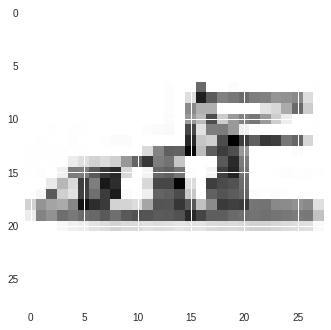

In [16]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

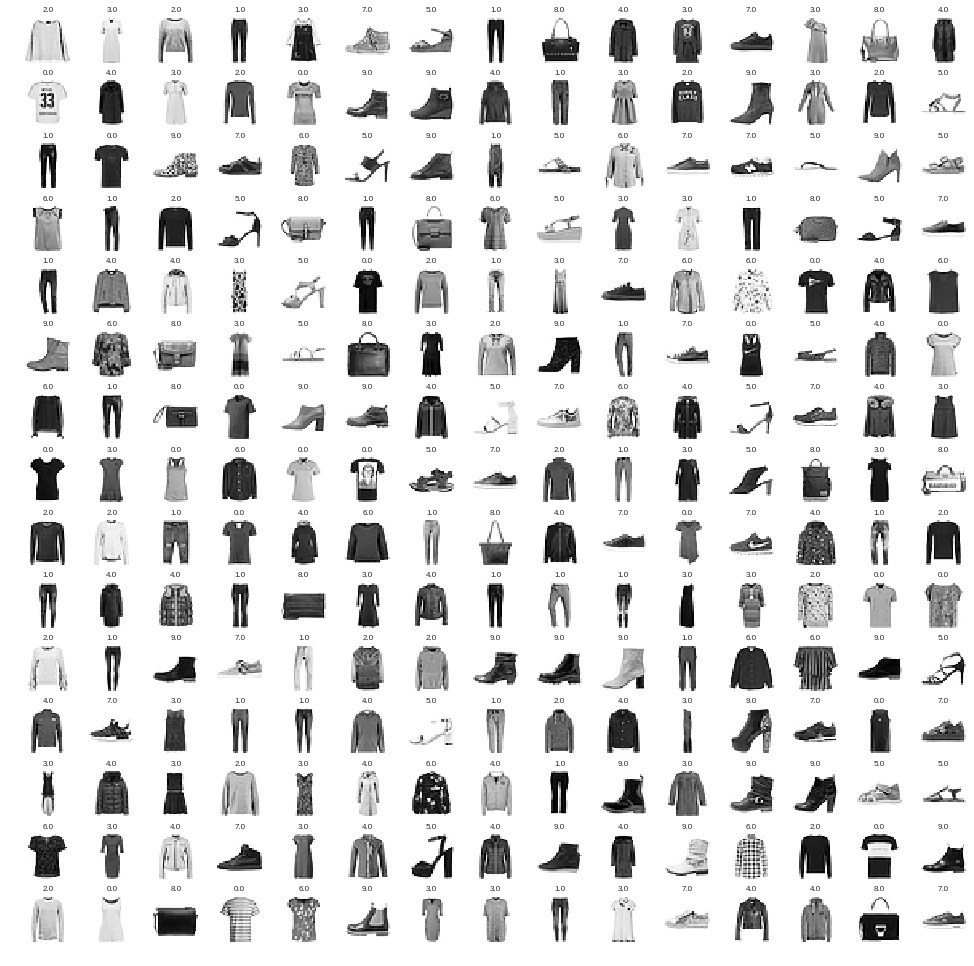

In [17]:
#View image in grid format
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid , W_grid , figsize = (17,17))

axes = axes.ravel()

n_training = len(training) #Got the length of training 

#Select a ranndom number from 0 to n_training 
for i in np.arange(0 ,W_grid * L_grid):
  #Create evenly spaces variables
  
  #Select a random number
  index = np.random.randint(0,n_training)
  
  #read and display an image with selected index
  axes[i].imshow(training[index,1:].reshape(28,28))
  axes[i].set_title(training[index,0] , fontsize = 8)
  axes[i].axis('off')
  
  
plt.subplots_adjust(hspace = 0.4)
  



# STEP 3# TRAINING THE MODEL

In [0]:
X_train = training[:,1:]/255
y_train = training [:,0]

In [0]:
X_test = testing[:,1:]/255
y_test = testing [:,0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_validate , y_train , y_validate = train_test_split(X_train, y_train , test_size = 0.2 , random_state = 12345)

In [0]:
X_train= X_train.reshape(X_train.shape[0] , *(28,28,1))
X_test= X_test.reshape(X_test.shape[0] , *(28,28,1))
X_validate= X_validate.reshape(X_validate.shape[0] , *(28,28,1))

In [30]:
X_train.shape

(48000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

In [32]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D ,Dense , Flatten , Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model  = Sequential()

In [38]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [40]:
cnn_model.add(Maxpooling2D(pool_size = (2,2)))

NameError: ignored

In [0]:
cnn_model.add(Flatten())

In [43]:
cnn_model.add(Dense(output_dim = 32 , activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [44]:
cnn_model.add(Dense(output_dim = 10 , activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [0]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(lr=0.001) , metrics =['accuracy'])

In [0]:
epochs = 50

In [55]:
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data = (X_validate , y_validate)
             )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.9944 - acc: 0.6149 - val_loss: 0.5267 - val_acc: 0.8123
Epoch 2/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.4773 - acc: 0.8308 - val_loss: 0.4248 - val_acc: 0.8476
Epoch 3/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.4030 - acc: 0.8576 - val_loss: 0.3783 - val_acc: 0.8677
Epoch 4/50
48000/48000 [==============================] - 2s 31us/step - loss: 0.3648 - acc: 0.8698 - val_loss: 0.3562 - val_acc: 0.8746
Epoch 5/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.3284 - acc: 0.8829 - val_loss: 0.3294 - val_acc: 0.8853
Epoch 6/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.3045 - acc: 0.8922 - val_loss: 0.3101 - val_acc: 0.8908
Epoch 7/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.2895 - acc: 0.8953 - val_loss: 0.3291 - val_ac

# STEP 4# EVALUATING THE MODEL

In [56]:
evaluation = cnn_model.evaluate(X_test , y_test)
print('Test Accuracy:{:3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 71us/step
Test Accuracy:0.904100


In [0]:
predicted_classes = cnn_model.predict_classes(X_test)

In [58]:
predicted_classes 

array([0, 1, 2, ..., 8, 8, 1])

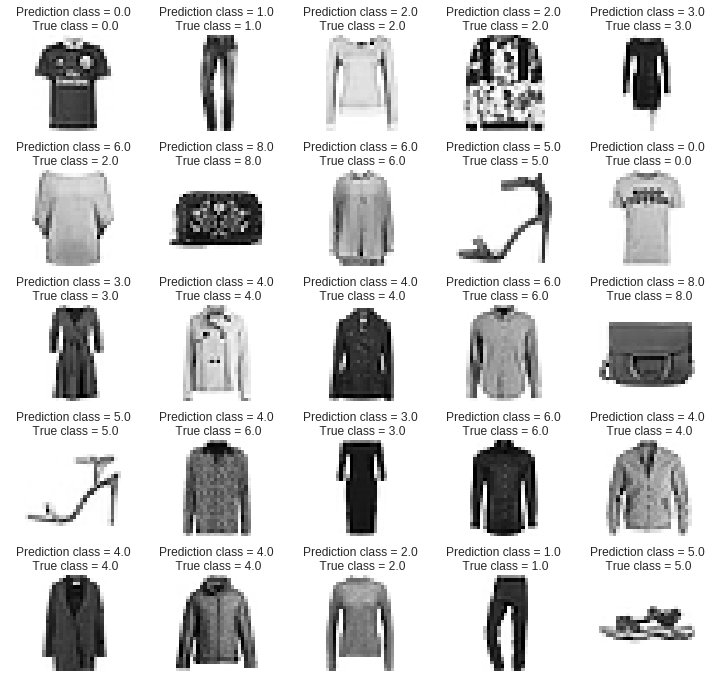

In [60]:
L = 5
W = 5
fig,axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')
  
plt.subplots_adjust(wspace = 0.5)

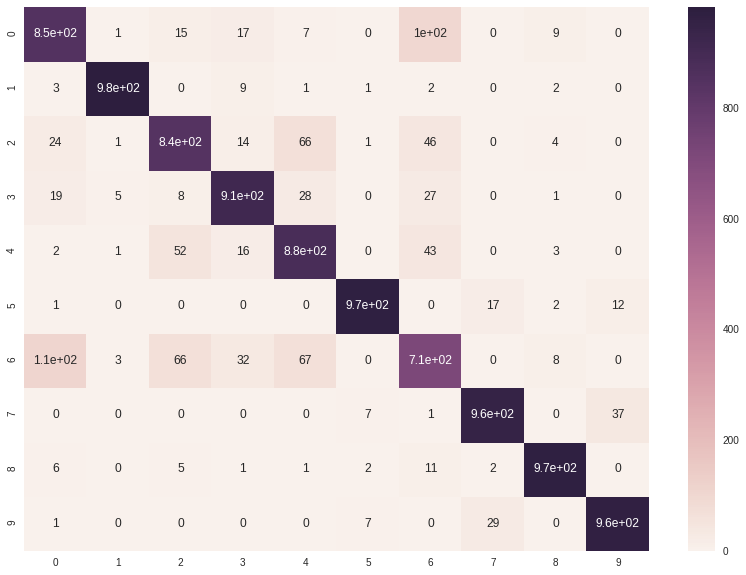

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm , annot = True)

              precision    recall  f1-score   support

     Class 0       0.84      0.85      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.85      0.84      0.85      1000
     Class 3       0.91      0.91      0.91      1000
     Class 4       0.84      0.88      0.86      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.75      0.71      0.73      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95      0.96      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



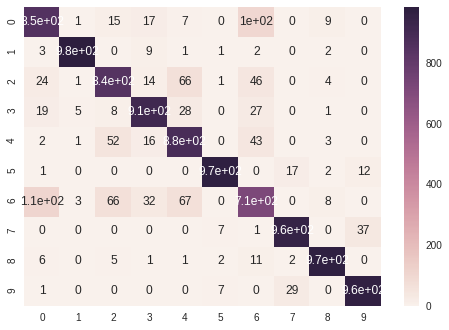

In [63]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test,predicted_classes , target_names = target_names))
sns.heatmap(cm , annot = True)